In [2]:
import pandas as pd


## Heuristics
- The following is an implementation of a heuristic generated to solve the following problem. 
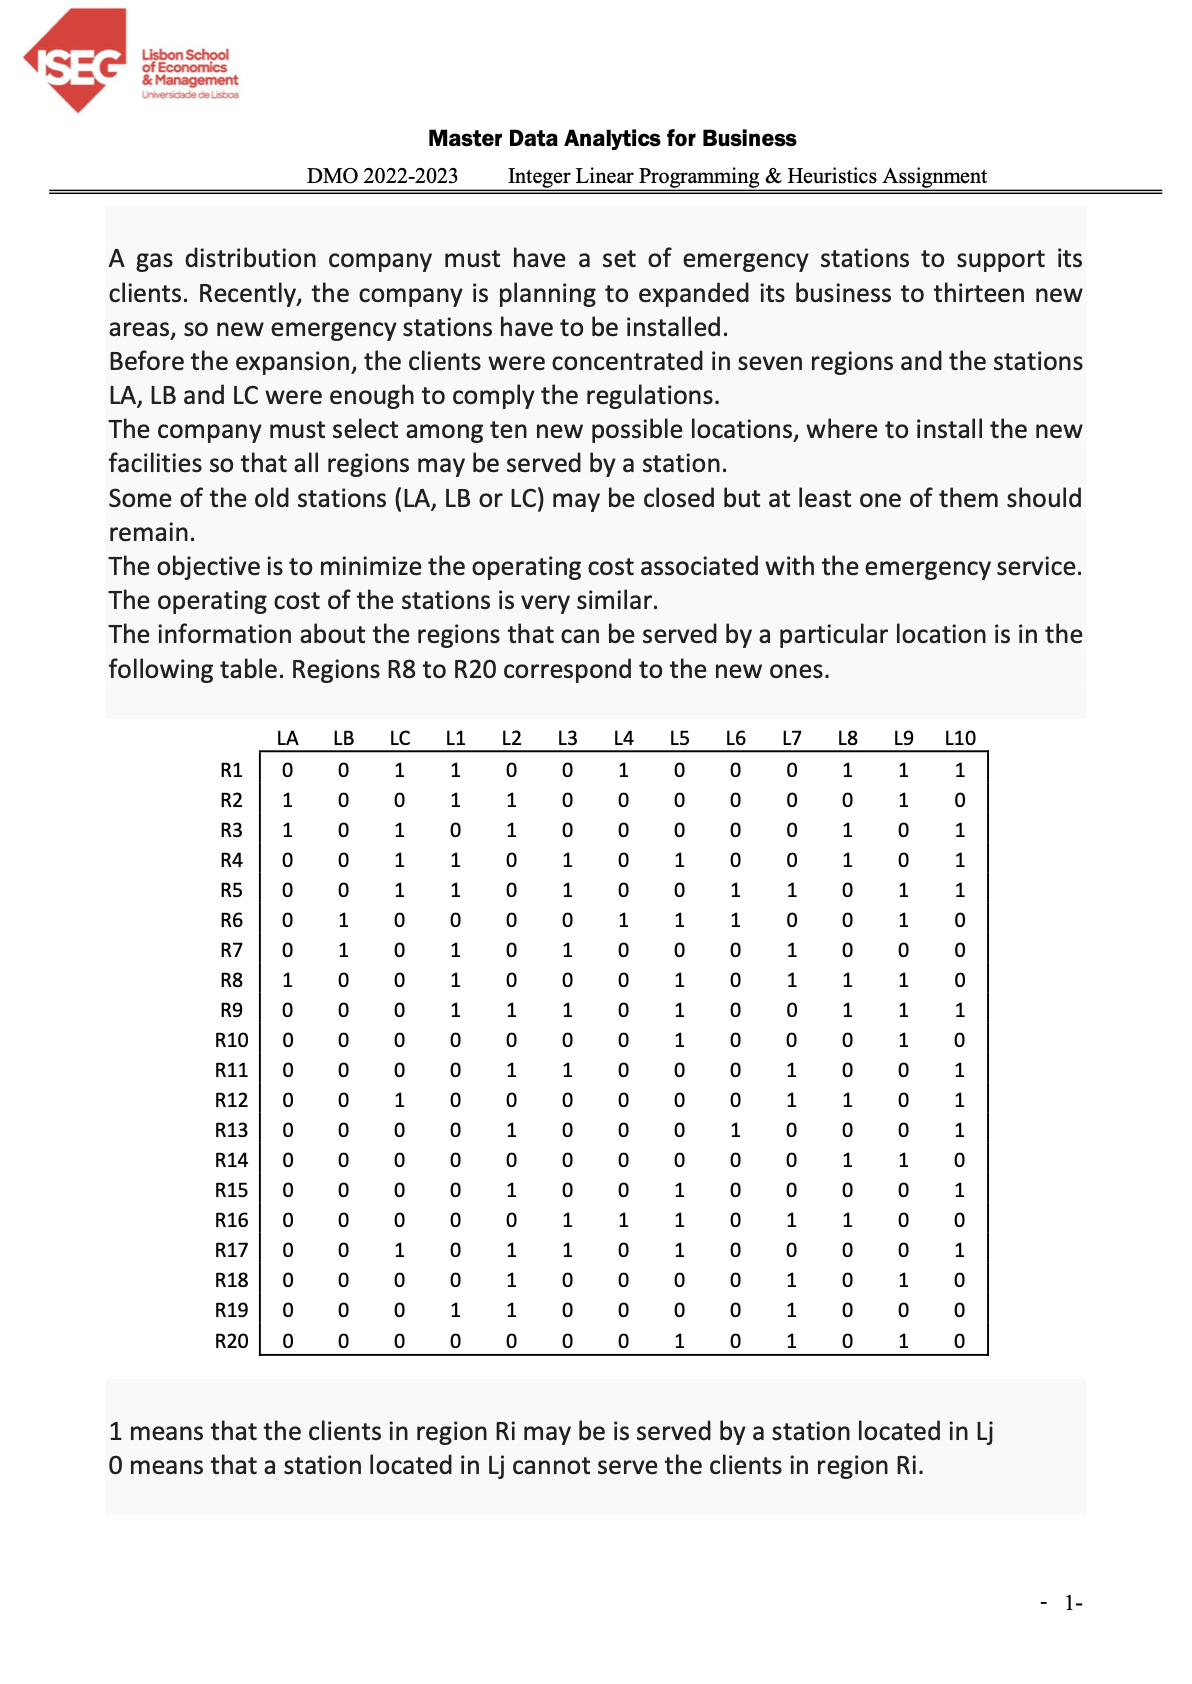

In [3]:
data_df = pd.read_excel(r'/Users/dhruvpandit/Documents/GitHub/ISEG_AEF/DMO-DAB/dabreport.xlsx').set_index('index')

def first_heurestic(dataframe_df): #dataframe with our original data
    dataframe = dataframe_df.copy() # copy ofdataframe so we dont modify original data
    list_stations = [] # list of stations to be returned
    max_old = dataframe[['LA', 'LB', 'LC']].sum().sort_values(ascending = False).index[0] # we need one old station to be open, for optimal we pick old station that serves max regions
    list_stations.append(max_old) # add it
    dataframe = dataframe[dataframe[max_old] == 0] # now we reduce our copy to only contain regions NOT served by the old station we just added
    def check_optimal(df): # function to check if we have reached optimality i.e if all regions have atleast one station
        return True if df.shape[0] == 0 else False
    def iterate(dataframe): #recursive function to add other stations
        if check_optimal(dataframe) == True: #check optimality, if optimal, return the list of stations
            return list_stations
        else:
            station = dataframe.sum().sort_values(ascending = False).index[0] #for our reduced dataframe, we get the station that serves the maximum regions that are still unserved
            list_stations.append(station) #add that station
            dataframe = dataframe[dataframe[station] == 0] # further reduce our dataframe to regions that are still not served
            iterate(dataframe) # call our recursive function to once again iterate through the dataframe
    iterate(dataframe) #iterate through our copy

    return list_stations

In [17]:
x = data_df[['LB', 'L2','L8' , 'L9']]
x[x.sum(axis = 1) == 0]

,LB,L2,L8,L9
index,,,,


In [3]:
print(first_heurestic(data_df))

['LC', 'L9', 'L2', 'L3']


In [4]:
def felix_even(dataframe):
    def getminstations(stations, df): #function to get the station with minimum regions while iterating through the rows
        l = {}
        for station in stations:
            l[station] = df[station].sum()
        l = pd.Series(l).sort_values(ascending=True)
        min = l.min()
        l = l[l == min]
        return l.sample(1).index[0] 
    regions_list = dataframe.index.to_list() #list of all regions
    unique_regions = dataframe[dataframe.sum(axis = 1) == 1].index.to_list() #list of regions where only one station serves each region
    regions_union = pd.Series(regions_list)[~pd.Series(regions_list).isin(unique_regions)].to_list()#list of regions where each region has one or more station serving it
    final_df = dataframe.copy() #our final dataframe
    final_df.loc[regions_union, final_df.columns] = 0 # we set each region that has one or more station serving it to 0
    for a in range(dataframe.shape[1] - 1): # now we iterate through the number of columns - 1
        temp_df = dataframe[dataframe.sum(axis = 1) == (a + 2)] #this is our dataframe where each region has number of stations serving it = a + 2
        # so at 0, this gives us a dataframe with regions having 2 stations serving it, at 1 it gives us for 3 stations etc
        # this continues until we reach the max. stations i.e regions having n stations serving it, were n is the stations passed in the function as parameter
        # if we pass in ['L1', 'L5', 'L10', 'L9', 'LB'], it terminates at regions having 5 stations serving it
        if temp_df.shape[0] == 0:
            continue # if there are no regions where the number of stations serving it are a + 2 we move on
        else:
            for row in temp_df.iterrows(): # iterate through the regions
                region = row[0] 
                stations_valid = row[1][row[1] == 1].index.to_list() #we return the list of stations serving that region
                station = getminstations(stations_valid, final_df) # here we return the station that is serving the minimum amonunt of regions at that point in the dataframe
                final_df.loc[region, station] = 1 # we set that station to serve that region
                #this continues until all regions are assigned a station, where the number of regions are balanced
    return final_df #return the final dataframe

In [6]:
felix_even(data_df[['L1','L5', 'L10', 'L9', 'LB']])

,L1,L5,L10,L9,LB
index,,,,,
R1,1,0,0,0,0
R2,1,0,0,0,0
R3,0,0,1,0,0
R4,1,0,0,0,0
R5,0,0,0,1,0
R6,0,0,0,0,1
R7,0,0,0,0,1
R8,1,0,0,0,0
R9,0,1,0,0,0


In [6]:
felix_even(data_df[first_heurestic(data_df)])

,LC,L9,L2,L3
index,,,,
R1,1,0,0,0
R2,0,0,1,0
R3,1,0,0,0
R4,0,0,0,1
R5,1,0,0,0
R6,0,1,0,0
R7,0,0,0,1
R8,0,1,0,0
R9,0,0,0,1


In [219]:

import random
def checkRegionsSat(dataframe_final):
    return True if dataframe_final[dataframe_final.sum(axis = 1) == 0].shape[0] == 0 else False
regions_list = new.index.to_list()
unique_regions = new[new.sum(axis = 1) == 1].index.to_list()
regions_union = pd.Series(regions_list)[~pd.Series(regions_list).isin(unique_regions)].to_list()
#regions_list is unique_regions

stations_ascending_regions = new.sum().sort_values(ascending=True).index.to_list()
new2 = new[new.sum(axis = 1) == 1]
new3 = new[new.sum(axis = 1) > 1]
final_df = new.copy()
final_df.loc[regions_union, final_df.columns] = 0
num_balance = new2.sum().sort_values(ascending=False).head(1).values[0]
for station in stations_ascending_regions:
    if station == new.sum().sort_values(ascending=True).index[0]:
        # final_df.loc[new3[new3[station] == 1].index.to_list(), final_df.columns != station] = 0
        # final_df.loc[new3[new3[station] == 1].index.to_list(), station] = 1
        list3unino = final_df[final_df.sum(axis = 1) == 0].index.to_series()[final_df[final_df.sum(axis = 1) == 0].index.to_series().isin(new[new[station] == 1].index.to_list())].index.to_list()
        #print(list3unino)
        i = num_balance - final_df[final_df[station] == 1].shape[0]
        list3unino = random.sample(list3unino, i)
        final_df.loc[list3unino, station] = 1
    else:
        if checkRegionsSat(final_df):
            print('hello')

        else:
            list3unino = final_df[final_df.sum(axis = 1) == 0].index.to_series()[final_df[final_df.sum(axis = 1) == 0].index.to_series().isin(new[new[station] == 1].index.to_list())].index.to_list()
            final_df.loc[list3unino, station] = 1
            if final_df[final_df[station] == 1].shape[0] != num_balance:
                m = num_balance - final_df[final_df[station] == 1].shape[0]
                not_regions_sat = new[new.sum(axis=1) != 0].index.to_series()
                sample_to_array = not_regions_sat[not_regions_sat.isin(final_df[final_df[station] == 1].index.to_series())].index.to_list()
                array = random.sample(sample_to_array, m)
                #array = random.sample(new[new[station] == 1].index.to_series()[~new[new[station] == 1].index.to_series().isin(final_df[final_df[station] == 1].index.to_series())].index.to_list(), m)
                final_df.loc[array, station] = 1
            



hello


In [209]:
def make_even(new):

    import random
    def checkRegionsSat(dataframe_final):
        return True if dataframe_final[dataframe_final.sum(axis = 1) == 0].shape[0] == 0 else False
    regions_list = new.index.to_list()
    unique_regions = new[new.sum(axis = 1) == 1].index.to_list()
    regions_union = pd.Series(regions_list)[~pd.Series(regions_list).isin(unique_regions)].to_list()
    #regions_list is unique_regions

    stations_ascending_regions = new.sum().sort_values(ascending=True).index.to_list()
    new2 = new[new.sum(axis = 1) == 1]
    new3 = new[new.sum(axis = 1) > 1]
    final_df = new.copy()
    final_df.loc[regions_union, final_df.columns] = 0
    num_balance = new2.sum().sort_values(ascending=False).head(1).values[0]
    for station in stations_ascending_regions:
        if station == new.sum().sort_values(ascending=True).index[0]:
            # final_df.loc[new3[new3[station] == 1].index.to_list(), final_df.columns != station] = 0
            # final_df.loc[new3[new3[station] == 1].index.to_list(), station] = 1
            list3unino = final_df[final_df.sum(axis = 1) == 0].index.to_series()[final_df[final_df.sum(axis = 1) == 0].index.to_series().isin(new[new[station] == 1].index.to_list())].index.to_list()
            #print(list3unino)
            i = num_balance - final_df[final_df[station] == 1].shape[0]
            list3unino = random.sample(list3unino, i)
            final_df.loc[list3unino, station] = 1
        else:
            if checkRegionsSat(final_df):
                print('hello')
                
            else:
                list3unino = final_df[final_df.sum(axis = 1) == 0].index.to_series()[final_df[final_df.sum(axis = 1) == 0].index.to_series().isin(new[new[station] == 1].index.to_list())].index.to_list()
                final_df.loc[list3unino, station] = 1
                if final_df[final_df[station] == 1].shape[0] != num_balance:
                    m = num_balance - final_df[final_df[station] == 1].shape[0]
                    not_regions_sat = new[new.sum(axis=1) != 0].index.to_series()
                    sample_to_array = not_regions_sat[not_regions_sat.isin(final_df[final_df[station] == 1].index.to_series())].index.to_list()
                    array = random.sample(sample_to_array, m)
                    #array = random.sample(new[new[station] == 1].index.to_series()[~new[new[station] == 1].index.to_series().isin(final_df[final_df[station] == 1].index.to_series())].index.to_list(), m)
                    final_df.loc[array, station] = 1

    return new             

